# Bead count

This module will demonstrate how to seperate the image into smaller images of the clusters. The pipeline performs the following operations:
    
    - Load image.
    - Convert image to grayscale.
    - Convert image to binary.
    - Convert image to set.
    - Dilate image by factor x.
    - For all foreground pixels find connected pixels as new set with flood fill algorithm.
    - Get boundary boxes.
    - Extract subimages.
    - Write subimages to disk.

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

from scipy import ndimage as ndi
from skimage.morphology import watershed
from skimage.feature import peak_local_max

from skimage import data, color
from skimage.transform import hough_circle, hough_circle_peaks
from skimage.filters import scharr
from skimage.feature import canny
from skimage.draw import circle_perimeter
from skimage.util import img_as_ubyte

import modules.oiplib as oiplib

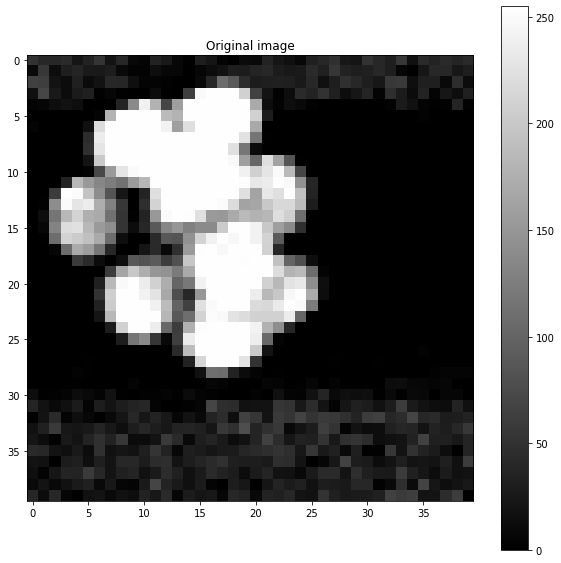

In [2]:
# Load picture.
grayImg = oiplib.rgb2GrayLuminosity(oiplib.loadImage('../images/clusters/cluster005.png'))
oiplib.showImage(grayImg, "Original image", figsize=(10, 10), cmap="gray");

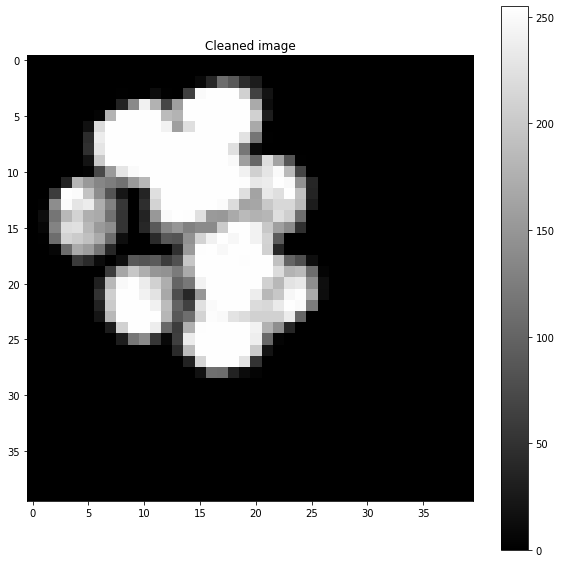

In [5]:
# Remove noise.
grayImg = oiplib.removeBackgroundNoise(grayImg)
oiplib.showImage(grayImg, "Cleaned image", figsize=(10, 10), cmap="gray");

In [ ]:
# Detect regions.
binImg = oiplib.growBinary(oiplib.gray2Binary(grayImg), 1)
distance = ndi.distance_transform_edt(binImg)
local_maxi = peak_local_max(distance, indices=False, footprint=np.ones((3,3)), labels=binImg)
markers = ndi.label(local_maxi)[0]
labels = watershed(-distance, markers, mask=binImg)

fig, axes = plt.subplots(ncols=3, figsize=(9, 3), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(binImg, cmap="gray")
ax[0].set_title('Overlapping objects')
ax[1].imshow(-distance, cmap="gray")
ax[1].set_title('Distances')
ax[2].imshow(labels, cmap=plt.cm.nipy_spectral)
ax[2].set_title('Separated objects')

for a in ax:
    a.set_axis_off()

fig.tight_layout()
plt.show()

# oiplib.showImage(distance, "Binary image", figsize=(10, 10), cmap="twilight", vmax=np.max(distance));
# oiplib.showImage(edgeImg, "Original image", figsize=(10, 10), cmap="gray", vmax=255);


# # Detect two radii
# hough_radii = np.arange(20, 35, 2)
# hough_res = hough_circle(edges, hough_radii)

# # Select the most prominent 3 circles
# accums, cx, cy, radii = hough_circle_peaks(hough_res, hough_radii,
#                                            total_num_peaks=3)

# # Draw them
# fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 4))
# image = color.gray2rgb(image)
# for center_y, center_x, radius in zip(cy, cx, radii):
#     circy, circx = circle_perimeter(center_y, center_x, radius,
#                                     shape=image.shape)
#     image[circy, circx] = (220, 20, 20)

# ax.imshow(image, cmap=plt.cm.gray)
# plt.show()